# PredatorPrey-P3-p1-s3-coop-v0 Heuristic experiment analysis 

In [1]:
import os.path as osp
from typing import List, Any, Optional, Tuple, Callable
from itertools import permutations, product

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import posggym_agents

import baposgmcp.plot as plot_utils
from baposgmcp.config import BASE_REPO_DIR

baposgmcp_results_file = osp.join(
    BASE_REPO_DIR, "experiments", "PredatorPrey-P3-p1-s3-coop-v0", "results", "klr_results.csv"
)
figure_dir = osp.join(
    BASE_REPO_DIR, "experiments", "PredatorPrey-P3-p1-s3-coop-v0", "figures"
)
policy_results_file = osp.join(
    posggym_agents.config.BASE_DIR, 'agents', "predatorprey_P3_p1_s3_coop_v0", "results", "pairwise_results.csv"
)

# Problem size

- Grid size = 16 x 16
- Num free coods = 145 
- Num goal = 3

**States**

```
= evader_states * pursuer_states 
= (pos * dir * goal * min_goal_dist) * (pos * dir)
= (145 * 4 * 3 * 23) * (145 * 4) 
= 23,211,600
```

**Actions** = 4 (Forward, Backward, Left, Right)

**Observations**

```
= adj_cells * seed * heard * evader_start_coord, pursuer_start_coord * goal_coord
= 2**4 * 2 * 2 * 6 * 2 * 6
= 4,608
```

Coord observations are constant throught an episode so only influence branching for the initial observation.
Given agents know their initial location and the map is fixed and known the branching is `2*2=4`.

## The Environment

In [7]:
fig, ax = plot_utils.plot_environment("PredatorPrey10x10-P3-p2-s3-coop-v0", (9, 9))
fig.savefig(osp.join(figure_dir, "env.png"))
plt.show()

## Loading Heuristic Policy Data

In [2]:
policy_df = plot_utils.import_results(
    policy_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)

coplayer_policy_ids = policy_df["policy_id"].unique().tolist()
coplayer_policy_ids.sort()
print("Policies")
print("--------")
for pi_id in coplayer_policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in policy_df.columns:
    print("  ", c)

Policies
--------
   heuristic1-v0
   heuristic2-v0
   heuristic3-v0
   heuristic4-v0

Columns
-------
   Unnamed: 0
   exp_id
   agent_id
   env_name
   policy_id
   exp_seed
   num_episodes
   time_limit
   episode_return_mean
   episode_return_std
   episode_return_max
   episode_return_min
   episode_steps_mean
   episode_steps_std
   episode_time_mean
   episode_time_std
   num_episode_done
   num_LOSS
   num_DRAW
   num_WIN
   num_NA
   episode_return_CI
   episode_steps_CI
   episode_time_CI
   prop_LOSS
   prop_DRAW
   prop_WIN
   prop_NA
   coplayer_policy_id


## Loading BAPOSGMCP Data

In [3]:
baposgmcp_df = plot_utils.import_results(
    baposgmcp_results_file, clean_policy_id=True, add_coplayer_policy_id=True
)
policy_ids = baposgmcp_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

/home/jonathon/code/ba-posgmcp/baposgmcp/plot/utils.py:95: DtypeWarning: Columns (10,11,12,15,16,18,19,20,21,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(result_file)


Policies
--------
   POMetaRollout_greedy_numsims1000_actionselectionpucb
   POMetaRollout_greedy_numsims1000_actionselectionucb
   POMetaRollout_greedy_numsims1000_actionselectionuniform
   POMetaRollout_greedy_numsims100_actionselectionpucb
   POMetaRollout_greedy_numsims100_actionselectionucb
   POMetaRollout_greedy_numsims100_actionselectionuniform
   POMetaRollout_greedy_numsims10_actionselectionpucb
   POMetaRollout_greedy_numsims10_actionselectionucb
   POMetaRollout_greedy_numsims10_actionselectionuniform
   POMetaRollout_greedy_numsims2000_actionselectionpucb
   POMetaRollout_greedy_numsims2000_actionselectionucb
   POMetaRollout_greedy_numsims2000_actionselectionuniform
   POMetaRollout_greedy_numsims500_actionselectionpucb
   POMetaRollout_greedy_numsims500_actionselectionucb
   POMetaRollout_greedy_numsims500_actionselectionuniform
   POMetaRollout_greedy_numsims50_actionselectionpucb
   POMetaRollout_greedy_numsims50_actionselectionucb
   POMetaRollout_greedy_numsims50_act

## Combine data

In [4]:
# First need to update exp_ids of one dataframe so there are no duplicate exp_ids
df1 = baposgmcp_df
df2 = policy_df

df1_max_exp_id = df1["exp_id"].max()
if df2["exp_id"].min() <= df1_max_exp_id:
    df2["exp_id"] += df1_max_exp_id+1

combined_df = pd.concat([baposgmcp_df, policy_df]).reset_index(drop=True)
    
policy_ids = combined_df["policy_id"].unique().tolist()
policy_ids.sort()
print("Policies")
print("--------")
for pi_id in policy_ids:
    print("  ", pi_id)

print("\nColumns")
print("-------")
for c in baposgmcp_df.columns:
    print("  ", c)

Policies
--------
   POMetaRollout_greedy_numsims1000_actionselectionpucb
   POMetaRollout_greedy_numsims1000_actionselectionucb
   POMetaRollout_greedy_numsims1000_actionselectionuniform
   POMetaRollout_greedy_numsims100_actionselectionpucb
   POMetaRollout_greedy_numsims100_actionselectionucb
   POMetaRollout_greedy_numsims100_actionselectionuniform
   POMetaRollout_greedy_numsims10_actionselectionpucb
   POMetaRollout_greedy_numsims10_actionselectionucb
   POMetaRollout_greedy_numsims10_actionselectionuniform
   POMetaRollout_greedy_numsims2000_actionselectionpucb
   POMetaRollout_greedy_numsims2000_actionselectionucb
   POMetaRollout_greedy_numsims2000_actionselectionuniform
   POMetaRollout_greedy_numsims500_actionselectionpucb
   POMetaRollout_greedy_numsims500_actionselectionucb
   POMetaRollout_greedy_numsims500_actionselectionuniform
   POMetaRollout_greedy_numsims50_actionselectionpucb
   POMetaRollout_greedy_numsims50_actionselectionucb
   POMetaRollout_greedy_numsims50_act

## Pairwise performance

Here we look at the performance of each policy against each other policy including BAPOSGMCP and baselines with different number of simulations, action selection, and meta-policies.

In [5]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="episode_return_mean", 
    policy_key="policy_id",
    y_err_key="episode_return_CI",
    vrange=None, 
    figsize=(24, 100), 
    valfmt="{x:.2f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

In [6]:
plot_utils.plot_pairwise_comparison(
    combined_df,
    y_key="num_episodes", 
    policy_key="policy_id",
    y_err_key=None,
    vrange=None, 
    figsize=(16, 100), 
    valfmt="{x:.0f}",
    coplayer_policies=coplayer_policy_ids,
    average_duplicates=True,
    duplicate_warning=False
)

## Policy Prior Performance

Here we look at the expected performance against the policy prior of BAPOSGMCP.

In [7]:
policy_prior = {1: {
    "heuristic1-v0": 1/4,
    "heuristic2-v0": 1/4,
    "heuristic3-v0": 1/4,
    "heuristic4-v0": 1/4
}}

# Meta-Policies
metapolicies = ["greedy", "softmax", "uniform"]
action_selections = ["pucb", "ucb", "uniform"]
algs = {
    "POMetaRollout": ("metapolicy", "actionselection", "numsims"),
    "POMeta": ("metapolicy", "numsims"),
    "baposgmcp": ("metapolicy", "actionselection", "numsims"),
    "baposgmcp_fixed": ("actionselection", "numsims", "pi"),
    "baposgmcp_random": ("actionselection", "numsims"),
    "metabaseline": ("metapolicy"),
    "heuristic1-v0": ("",)
}

# Plot via num sims
policies_with_sims = [
    "POMetaRollout_pucb_greedy",
    "POMetaRollout_pucb_softmax",
    "POMetaRollout_pucb_uniform",
    "POMeta_greedy",
    "POMeta_softmax",
    "POMeta_uniform",
    "baposgmcp_greedy",
    "baposgmcp_softmax",
    "baposgmcp_uniform"
]

policies_without_sims = [
    "metabaseline_greedy",
    "metabaseline_softmax",
    "metabaseline_uniform",
]

In [8]:
expected_mean_returns_values, expected_mean_returns_err_values, exp_policy_ids = plot_utils.get_expected_values_by_prior(
    combined_df,
    y_key="episode_return_mean",
    y_err_key="episode_return_CI",
    policy_key="policy_id",
    policy_prior=policy_prior
)
for i, policy_id in enumerate(exp_policy_ids):
    value = expected_mean_returns_values[i]
    err_value = expected_mean_returns_err_values[i]
    print(f"{policy_id} = {value:.2f} +/- {err_value:.2f}")

POMetaRollout_greedy_numsims1000_actionselectionpucb = 0.60 +/- 0.03
POMetaRollout_greedy_numsims1000_actionselectionucb = 0.59 +/- 0.02
POMetaRollout_greedy_numsims1000_actionselectionuniform = 0.58 +/- 0.02
POMetaRollout_greedy_numsims100_actionselectionpucb = 0.55 +/- 0.03
POMetaRollout_greedy_numsims100_actionselectionucb = 0.44 +/- 0.02
POMetaRollout_greedy_numsims100_actionselectionuniform = 0.48 +/- 0.02
POMetaRollout_greedy_numsims10_actionselectionpucb = 0.38 +/- 0.02
POMetaRollout_greedy_numsims10_actionselectionucb = 0.16 +/- 0.01
POMetaRollout_greedy_numsims10_actionselectionuniform = 0.39 +/- 0.02
POMetaRollout_greedy_numsims2000_actionselectionpucb = 0.65 +/- 0.02
POMetaRollout_greedy_numsims2000_actionselectionucb = 0.64 +/- 0.02
POMetaRollout_greedy_numsims2000_actionselectionuniform = 0.64 +/- 0.02
POMetaRollout_greedy_numsims500_actionselectionpucb = 0.59 +/- 0.02
POMetaRollout_greedy_numsims500_actionselectionucb = 0.56 +/- 0.02
POMetaRollout_greedy_numsims500_action

In [9]:
alg_names = set()
for pi_id in exp_policy_ids:
    tokens = pi_id.split("_")
    alg_id = "_".join([t for t in tokens if all(s not in t for s in ["actionselection", "numsims"])])
    alg_names.add(alg_id)
    
alg_names = list(alg_names)
alg_names.sort()
for n in alg_names:
    print(n)

POMetaRollout_greedy
POMetaRollout_softmax
POMetaRollout_uniform
POMeta_greedy
POMeta_softmax
POMeta_uniform
baposgmcp_fixed_piheuristic1-v0
baposgmcp_fixed_piheuristic2-v0
baposgmcp_fixed_piheuristic3-v0
baposgmcp_fixed_piheuristic4-v0
baposgmcp_greedy
baposgmcp_random
baposgmcp_softmax
baposgmcp_uniform
heuristic1-v0
heuristic2-v0
heuristic3-v0
heuristic4-v0
metabaseline_greedy
metabaseline_softmax
metabaseline_uniform


## The variables

We have a range of policies and variables, namely:

- metapolicy = "greedy", "softmax", "uniform"
- action selection = "pucb", "ucb", "uniform"

And also comparing "fixed" policy prior versus using a meta-policy


## Action selection

To start we will look at the effect of action selection strategy on performanc.

We will do this by comparing the performance action selection strategies for each different meta/fixed policy, to see if there is a dominant action selection strategy.

In [10]:
def plot_action_selection_vs_num_sims_v2(y_key: str,
                                         expected_values,
                                         expected_err_values,
                                         policy_ids,
                                         policy_prefix,
                                         yrange=None,
                                         ax=None):
    """Plot expected values for different action selction strategies by num_sims.

    Assumes policies with sims have IDs that include "_actionselection<strategy>" and "_numsims<n>".
    """
    values_by_strategy = {}
    all_num_sims = set()
    all_act_sel = set()
    for i, policy_id in enumerate(policy_ids):
        if not policy_id.startswith(policy_prefix):
            continue

        tokens = policy_id.split("_")
        num_sims = None
        act_sel = None
        for t in tokens:
            if t.startswith("numsims"):
                num_sims = int(t.replace("numsims", ""))
            elif t.startswith("actionselection"):
                act_sel = t.replace("actionselection", "")
                
        if act_sel not in values_by_strategy:
            values_by_strategy[act_sel] = {"y": {}, "y_err": {}}
                
        value = expected_values[i]
        err_value = expected_err_values[i]
        values_by_strategy[act_sel]["y"][num_sims] = value
        values_by_strategy[act_sel]["y_err"][num_sims] = err_value
        all_num_sims.add(num_sims)
        all_act_sel.add(act_sel)

    all_num_sims = list(all_num_sims)
    all_num_sims.sort()
    all_act_sel = list(all_act_sel)
    all_act_sel.sort()
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    for act_sel in all_act_sel:
        y_map = values_by_strategy[act_sel]["y"]
        y_err_map = values_by_strategy[act_sel]["y_err"]
        num_sims = list(y_map)
        num_sims.sort()

        y = np.array([y_map[n] for n in num_sims])
        y_err = np.array([y_err_map[n] for n in num_sims])

        ax.plot(num_sims, y, label=act_sel)
        ax.fill_between(num_sims, y-y_err, y+y_err, alpha=0.2)
    
    if yrange:
        ax.set_ylim(yrange)
        
    ax.set_ylabel(y_key)
    ax.set_xlabel("num sims")
    ax.legend()
    

def plot_multiple_action_selection_vs_num_sims_v2(y_key: str,
                                                  expected_values,
                                                  expected_err_values,
                                                  policy_ids,
                                                  policy_prefixes,
                                                  yrange):
    if not isinstance(policy_prefixes[0], list):
        policy_prefixes = [policy_prefixes]
        
    num_rows = len(policy_prefixes)
    num_cols = max(len(p) for p in policy_prefixes)
    
    fig, axs = plt.subplots(
        nrows=num_rows, 
        ncols=num_cols, 
        figsize=(6*num_cols, 6*num_rows), 
        squeeze=False
    )
    
    for row_axs, prefix_list in zip(axs, policy_prefixes):
        for ax, prefix in zip(row_axs, prefix_list):
            plot_action_selection_vs_num_sims_v2(
                y_key=y_key,
                expected_values=expected_values,
                expected_err_values=expected_err_values,
                policy_ids=policy_ids,
                policy_prefix=prefix,
                yrange=yrange,
                ax=ax
            )
            ax.set_title(prefix)

In [11]:
plot_multiple_action_selection_vs_num_sims_v2(
    y_key="episode_return_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=exp_policy_ids,
    policy_prefixes=[
        ["baposgmcp_greedy", "baposgmcp_softmax", "baposgmcp_uniform"],
        ["baposgmcp_fixed_piheuristic1-v0", "baposgmcp_fixed_piheuristic2-v0", "baposgmcp_fixed_piheuristic3-v0"],
        ["baposgmcp_fixed_piheuristic4-v0", "baposgmcp_random"],
        ["POMetaRollout_greedy", "POMetaRollout_softmax", "POMetaRollout_uniform"]
    ],
    yrange=(0.1, 0.79)
)

## Comparison of the different Meta-Policies

From the above results we can see that PUCB is strictly dominant, especially for lower number of simulations.

Next we look at the effect of meta-policy. Where applicable we show performance for algorithms using PUCB only. 

In [12]:
def plot_meta_policy_vs_num_sims(y_key: str,
                                 expected_values,
                                 expected_err_values,
                                 policy_ids,
                                 policy_prefix,
                                 yrange=None,
                                 ax=None,
                                 action_selection: str = "pucb"):
    """Plot expected values for different meta-policies by num_sims.

    Assumes policies with sims have IDs that include 
    "_<metapolicy>"
    "_numsims<n>"
    
    and optionally "_actionselection<strategy>"
    """
    values_by_metapi = {}
    all_num_sims = set()
    all_meta_pis = set()
    for i, policy_id in enumerate(policy_ids):
        if not policy_id.startswith(policy_prefix):
            continue

        tokens = policy_id.split("_")
        num_sims = None
        act_sel = None
        # assume policyprefix_metapi
        meta_pi = tokens[1]
        for t in tokens:
            if t.startswith("numsims"):
                num_sims = int(t.replace("numsims", ""))
            elif t.startswith("actionselection"):
                act_sel = t.replace("actionselection", "")
                
        if act_sel is not None and act_sel != action_selection:
            continue
            
        if meta_pi not in values_by_metapi:
            values_by_metapi[meta_pi] = {"y": {}, "y_err": {}}
                
        value = expected_values[i]
        err_value = expected_err_values[i]
        values_by_metapi[meta_pi]["y"][num_sims] = value
        values_by_metapi[meta_pi]["y_err"][num_sims] = err_value
        all_num_sims.add(num_sims)
        all_meta_pis.add(meta_pi)

    all_num_sims = list(all_num_sims)
    all_num_sims.sort()
    all_meta_pis = list(all_meta_pis)
    all_meta_pis.sort()
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    for meta_pi in all_meta_pis:
        y_map = values_by_metapi[meta_pi]["y"]
        y_err_map = values_by_metapi[meta_pi]["y_err"]
        num_sims = list(y_map)
        num_sims.sort()

        y = np.array([y_map[n] for n in num_sims])
        y_err = np.array([y_err_map[n] for n in num_sims])

        ax.plot(num_sims, y, label=meta_pi)
        ax.fill_between(num_sims, y-y_err, y+y_err, alpha=0.2)
    
    if yrange:
        ax.set_ylim(yrange)
        
    ax.set_ylabel(y_key)
    ax.set_xlabel("num sims")
    ax.legend()
    
    
def plot_meta_policy_for_nonsim(y_key: str,
                                expected_values,
                                expected_err_values,
                                policy_ids,
                                policy_prefix,
                                yrange=None,
                                ax=None):
    """Plot expected values for different meta-policies for non-sim policies.

    Assumes policies with sims have IDs that include 
    "_<metapolicy>"
    """
    values_by_metapi = {}
    all_meta_pis = set()
    for i, policy_id in enumerate(policy_ids):
        if not policy_id.startswith(policy_prefix):
            continue

        tokens = policy_id.split("_")
        # assume policyprefix_metapi
        meta_pi = tokens[1]
        assert meta_pi not in values_by_metapi
        values_by_metapi[meta_pi] = {}
                
        value = expected_values[i]
        err_value = expected_err_values[i]
        values_by_metapi[meta_pi]["y"] = value
        values_by_metapi[meta_pi]["y_err"] = err_value
        all_meta_pis.add(meta_pi)

    all_meta_pis = list(all_meta_pis)
    all_meta_pis.sort()
    
    xs = np.arange(len(all_meta_pis))
    ys = np.array([values_by_metapi[p]["y"] for p in all_meta_pis])
    y_errs = np.array([values_by_metapi[p]["y_err"] for p in all_meta_pis])
                   
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    
    ax.bar(xs, ys, yerr=y_errs, tick_label=all_meta_pis)
    
    if yrange:
        ax.set_ylim(yrange)
        
    ax.set_ylabel(y_key)
    ax.legend()
    

def plot_multiple_meta_policy_vs_num_sims(y_key: str,
                                          expected_values,
                                          expected_err_values,
                                          policy_ids,
                                          policy_prefixes,
                                          constant_policy_prefixes = None,
                                          yrange=None,
                                          action_selection: str = "pucb"):
    if not isinstance(policy_prefixes[0], list):
        policy_prefixes = [policy_prefixes]
        
    if not constant_policy_prefixes:
        constant_policy_prefixes = []
        
    num_rows = len(policy_prefixes)
    num_cols = max(len(p) for p in policy_prefixes)
    
    fig, axs = plt.subplots(
        nrows=num_rows, 
        ncols=num_cols, 
        figsize=(6*num_cols, 6*num_rows), 
        squeeze=False
    )
    
    for row_axs, prefix_list in zip(axs, policy_prefixes):
        for ax, prefix in zip(row_axs, prefix_list):
            if prefix in constant_policy_prefixes:
                plot_meta_policy_for_nonsim(
                    y_key=y_key,
                    expected_values=expected_values,
                    expected_err_values=expected_err_values,
                    policy_ids=policy_ids,
                    policy_prefix=prefix,
                    yrange=yrange,
                    ax=ax
                )
            else:
                plot_meta_policy_vs_num_sims(
                    y_key=y_key,
                    expected_values=expected_values,
                    expected_err_values=expected_err_values,
                    policy_ids=policy_ids,
                    policy_prefix=prefix,
                    yrange=yrange,
                    ax=ax,
                    action_selection=action_selection
                )
            ax.set_title(prefix)

In [13]:
# Select data for policies that use meta_policies
policy_prefixes_to_remove = [
    "baposgmcp_fixed", "baposgmcp_random"
]

meta_pi_expected_mean_returns_values = []
meta_pi_expected_mean_returns_err_values = []
meta_pi_policy_ids = []
for pi_id, y, y_err in zip(exp_policy_ids, expected_mean_returns_values, expected_mean_returns_err_values):
    if any(pi_id.startswith(p) for p in policy_prefixes_to_remove):
        continue
    meta_pi_policy_ids.append(pi_id)
    meta_pi_expected_mean_returns_values.append(y)
    meta_pi_expected_mean_returns_err_values.append(y_err)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


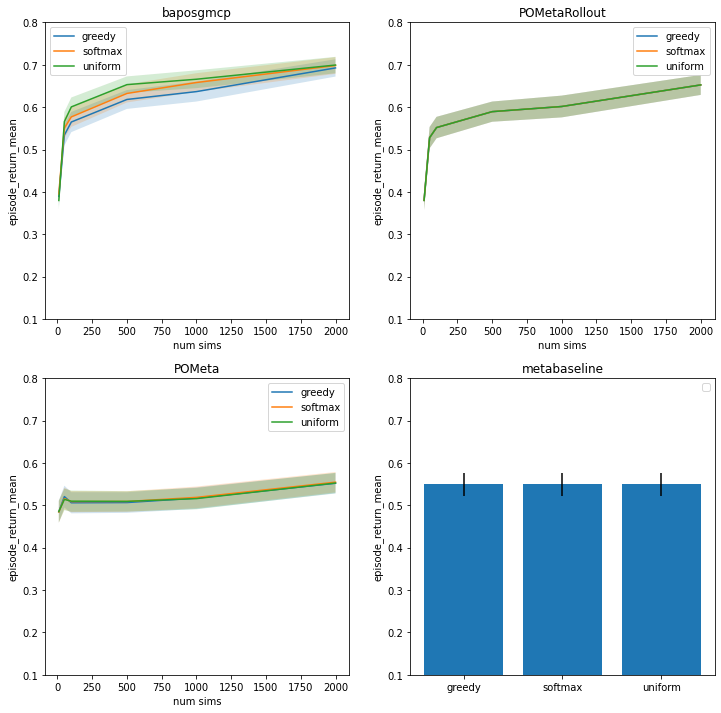

In [14]:
# Plot multiple plots comparing performance for the different meta-policies
# Each plot is a different algorithm: [BAPOSGMCP, POMetaRollout, MetaBaseline, POMeta]
plot_multiple_meta_policy_vs_num_sims(
    y_key="episode_return_mean",
    expected_values=meta_pi_expected_mean_returns_values,
    expected_err_values=meta_pi_expected_mean_returns_err_values,
    policy_ids=meta_pi_policy_ids,
    policy_prefixes=[
        ["baposgmcp", "POMetaRollout"],
        ["POMeta", "metabaseline"]
    ],
    constant_policy_prefixes=["metabaseline"],
    yrange=(0.1, 0.8),
    action_selection="pucb"
)

## Comparing Meta-Policy versus no meta-policy

Here we look at the performance of BAPOSGMCP (using PUCB) with using a meta-policy against not using a meta-policy (i.e. using the different fixed policies).


In [15]:
def plot_performance_vs_num_sims(y_key: str,
                                 expected_values,
                                 expected_err_values,
                                 policy_ids,
                                 policy_prefixes,
                                 yrange=None,
                                 ax=None,
                                 action_selection: str = "pucb"):
    """Plot expected values for different meta-policies by num_sims.

    Assumes policies with sims have IDs that include 
    "_numsims<n>"
    
    and optionally "_actionselection<strategy>"
    """
    values_by_pi = {}
    all_num_sims = set()
    for prefix in policy_prefixes:
        values_by_pi[prefix] = {"y": {}, "y_err": {}}
        for i, policy_id in enumerate(policy_ids):
            if not policy_id.startswith(prefix):
                continue

            tokens = policy_id.split("_")
            num_sims = None
            act_sel = None
            for t in tokens:
                if t.startswith("numsims"):
                    num_sims = int(t.replace("numsims", ""))
                elif t.startswith("actionselection"):
                    act_sel = t.replace("actionselection", "")

            if act_sel is not None and act_sel != action_selection:
                continue  
                
            if num_sims is not None:
                all_num_sims.add(num_sims)

            value = expected_values[i]
            err_value = expected_err_values[i]
            values_by_pi[prefix]["y"][num_sims] = value
            values_by_pi[prefix]["y_err"][num_sims] = err_value

    all_num_sims = list(all_num_sims)
    all_num_sims.sort()
    
    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 6))

    for prefix in policy_prefixes:
        y_map = values_by_pi[prefix]["y"]
        y_err_map = values_by_pi[prefix]["y_err"]
        num_sims = list(y_map)
        num_sims.sort()
        
        if len(num_sims) == 1 and num_sims[0] is None:
            # non-sim policy
            y = np.full(len(all_num_sims), y_map[None])
            y_err = np.full(len(all_num_sims), y_err_map[None])
            num_sims = all_num_sims
        else:
            y = np.array([y_map[n] for n in num_sims])
            y_err = np.array([y_err_map[n] for n in num_sims])

        ax.plot(num_sims, y, label=prefix)
        ax.fill_between(num_sims, y-y_err, y+y_err, alpha=0.2)
    
    if yrange:
        ax.set_ylim(yrange)
        
    ax.set_ylabel(y_key)
    ax.set_xlabel("num sims")
    ax.legend()
    

def plot_multiple_performance_vs_num_sims(y_key: str,
                                          expected_values,
                                          expected_err_values,
                                          policy_ids,
                                          policy_prefixes,
                                          yrange=None,
                                          action_selection: str = "pucb"):
    if not isinstance(policy_prefixes[0], list):
        policy_prefixes = [policy_prefixes]
        
    num_rows = 1
    num_cols = len(policy_prefixes)
    
    fig, axs = plt.subplots(
        nrows=num_rows, 
        ncols=num_cols, 
        figsize=(6*num_cols, 6*num_rows), 
        squeeze=False
    )
    
    for ax, prefix_list in zip(axs[0], policy_prefixes):
        plot_performance_vs_num_sims(
            y_key=y_key,
            expected_values=expected_values,
            expected_err_values=expected_err_values,
            policy_ids=policy_ids,
            policy_prefixes=prefix_list,
            yrange=yrange,
            ax=ax,
            action_selection=action_selection
        )

In [16]:
# Get data for BAPOSGMCP policies only
baposgmcp_expected_mean_returns_values = []
baposgmcp_expected_mean_returns_err_values = []
baposgmcp_policy_ids = []
for pi_id, y, y_err in zip(exp_policy_ids, expected_mean_returns_values, expected_mean_returns_err_values):
    if not pi_id.startswith("baposgmcp"):
        continue
    baposgmcp_policy_ids.append(pi_id)
    baposgmcp_expected_mean_returns_values.append(y)
    baposgmcp_expected_mean_returns_err_values.append(y_err)

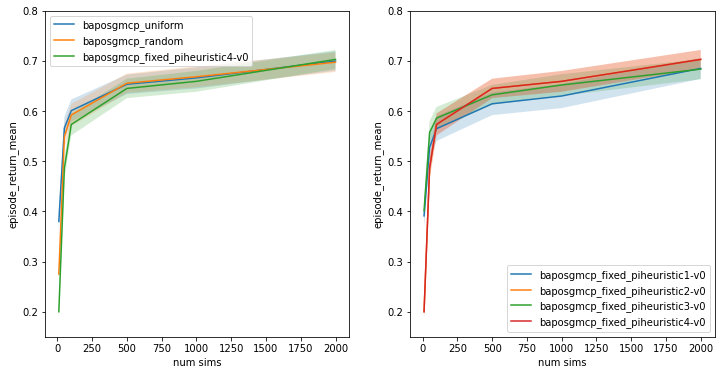

In [17]:
# TODO Plot BAPOSGMCP with best meta-policy against BAPOSGMCP_fixed and BAPOSGMCP_random
# Look at combining fixed into a single value (i.e. averaging over the different fixed policies)
plot_multiple_performance_vs_num_sims(
    y_key="episode_return_mean",
    expected_values=baposgmcp_expected_mean_returns_values,
    expected_err_values=baposgmcp_expected_mean_returns_err_values,
    policy_ids=baposgmcp_policy_ids,
    policy_prefixes=[
        ["baposgmcp_uniform", "baposgmcp_random", "baposgmcp_fixed_piheuristic4-v0"],
        [
            "baposgmcp_fixed_piheuristic1-v0", 
            "baposgmcp_fixed_piheuristic2-v0", 
            "baposgmcp_fixed_piheuristic3-v0",
            "baposgmcp_fixed_piheuristic4-v0"
        ],
    ],
    yrange=(0.15, 0.8),
    action_selection="pucb"
)

## Comparing BAPOSGMCP versus baselines



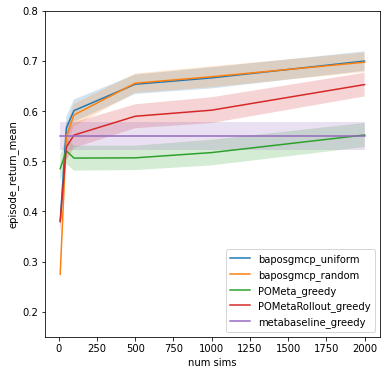

In [18]:
# prefix for all the policies we want to plot (i.e. the best policies for each algorithm)
policy_prefixes_to_plot = [
    "baposgmcp_uniform",
    "baposgmcp_random",
    "POMeta_greedy",
    "POMetaRollout_greedy",    # may have to change this
    "metabaseline_greedy"
]
plot_multiple_performance_vs_num_sims(
    y_key="episode_return_mean",
    expected_values=expected_mean_returns_values,
    expected_err_values=expected_mean_returns_err_values,
    policy_ids=exp_policy_ids,
    policy_prefixes=[policy_prefixes_to_plot],
    yrange=(0.15, 0.8),
    action_selection="pucb"
)

# Old stuff

Below has not been updated.

In [13]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_return_min",
    y_err_key="episode_return_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

## Looking at time

   - episode_steps
   - search_time
   - update_time
   - reinvigoration_time
   - policy_calls
   - inference_time
   - search_depth

In [14]:
policies_with_times = [
    "POMetaRollout_pucb_greedy",
    "POMetaRollout_pucb_softmax",
    "POMetaRollout_pucb_uniform",
    "POMeta_greedy",
    "POMeta_softmax",
    "POMeta_uniform",
    "baposgmcp_greedy",
    "baposgmcp_softmax",
    "baposgmcp_uniform"
]

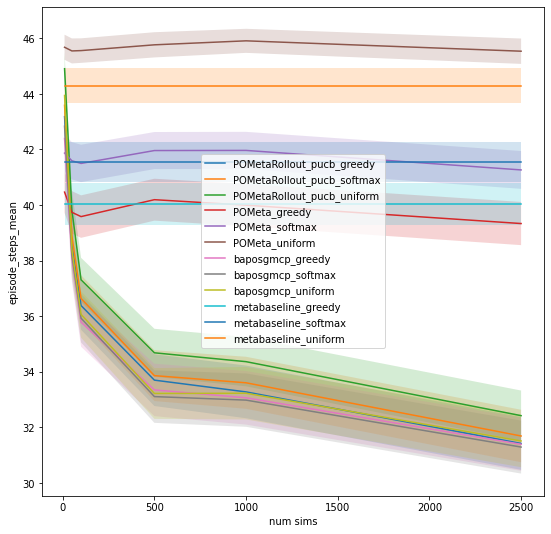

In [15]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="episode_steps_mean",
    y_err_key="episode_steps_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_sims,
    policies_without_sims=policies_without_sims
)

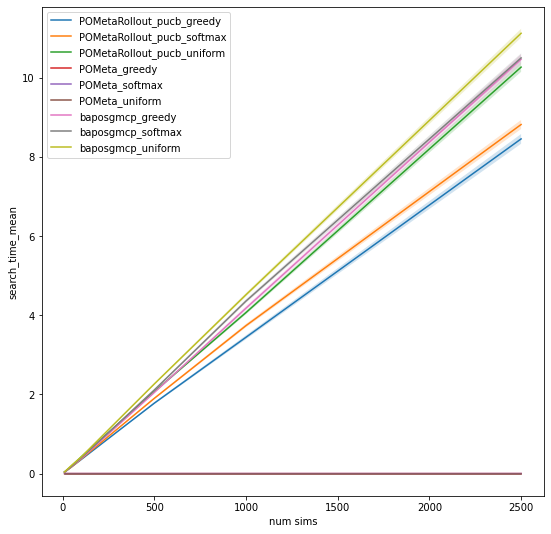

In [16]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_time_mean",
    y_err_key="search_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

In [17]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="evaluation_time_mean",
    y_err_key="evaluation_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

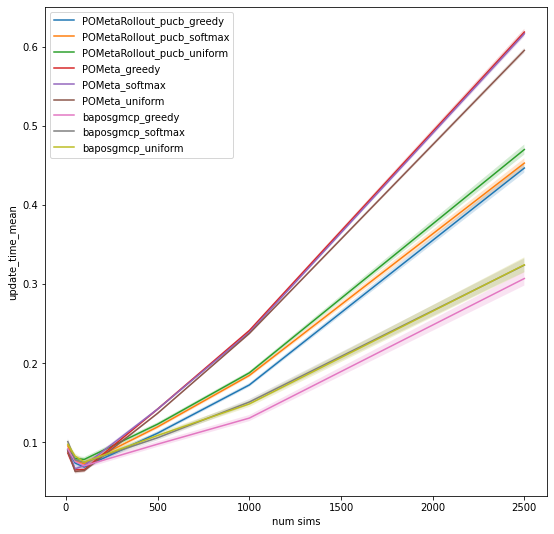

In [19]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="update_time_mean",
    y_err_key="update_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

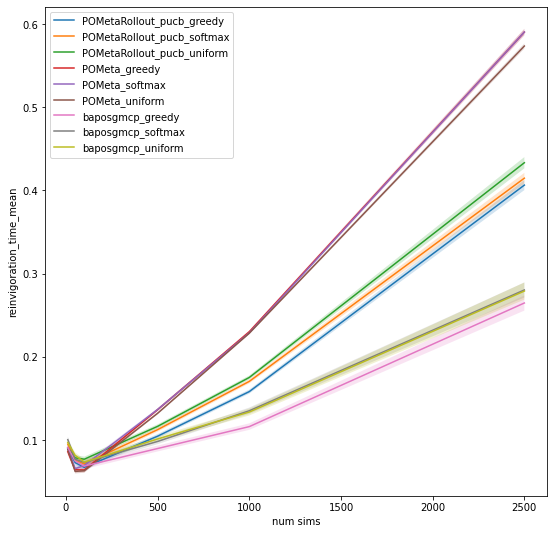

In [20]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="reinvigoration_time_mean",
    y_err_key="reinvigoration_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

In [21]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="inference_time_mean",
    y_err_key="inference_time_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

In [22]:
plot_utils.get_and_plot_expected_values_by_num_sims(
    combined_df,
    y_key="search_depth_mean",
    y_err_key="search_depth_CI",
    policy_key="policy_id",
    policy_prior=policy_prior,
    policies_with_sims=policies_with_times,
    policies_without_sims=[]
)

## Looking at Belief accuracy by steps

- action_dist_distance
- bayes_accuracy

In [23]:
policy_ids_by_alg = [
    ["baposgmcp_greedy_10", "baposgmcp_greedy_50", "baposgmcp_greedy_100", "baposgmcp_greedy_500", "baposgmcp_greedy_1000", "baposgmcp_greedy_2500"],
    ["baposgmcp_softmax_10", "baposgmcp_softmax_50", "baposgmcp_softmax_100", "baposgmcp_softmax_500", "baposgmcp_softmax_1000", "baposgmcp_softmax_2500"],
    ["baposgmcp_uniform_10", "baposgmcp_uniform_50", "baposgmcp_uniform_100", "baposgmcp_uniform_500", "baposgmcp_uniform_1000", "baposgmcp_uniform_2500"]
]

In [38]:
plot_utils.plot_expected_belief_stat_by_step(
    combined_df,
    y_key_prefix="bayes_accuracy",
    policy_ids=policy_ids_by_alg,
    policy_prior=policy_prior,
    step_limit=50,
    other_agent_id=1,
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    y_suffix="mean",
    y_err_suffix="CI",
    figsize=(18, 9)
)

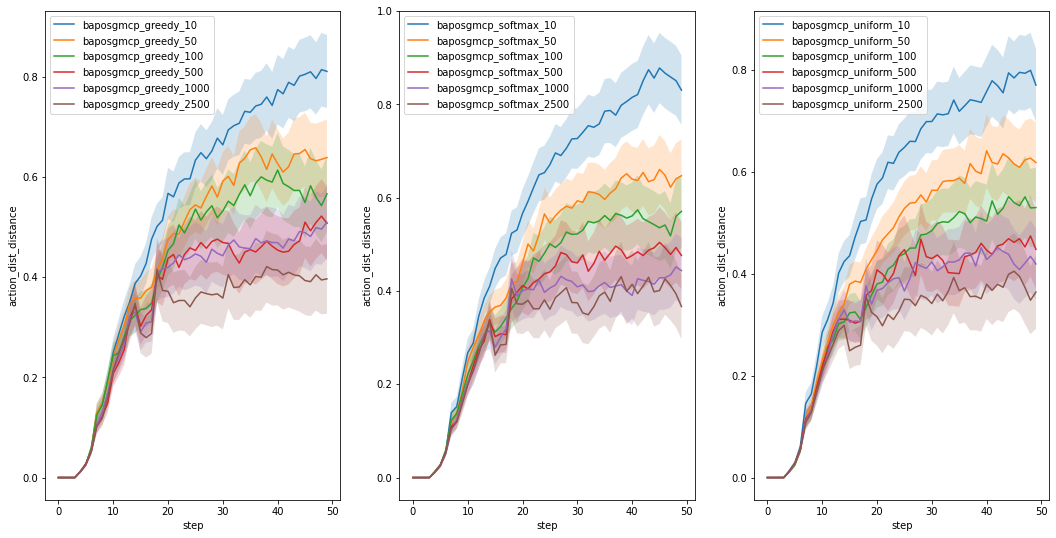

In [25]:
plot_utils.plot_expected_belief_stat_by_step(
    combined_df,
    y_key_prefix="action_dist_distance",
    policy_ids=policy_ids_by_alg,
    policy_prior=policy_prior,
    step_limit=50,
    other_agent_id=1,
    policy_key="policy_id",
    coplayer_policy_key="coplayer_policy_id",
    y_suffix="mean",
    y_err_suffix="CI",
    figsize=(18, 9)
)